1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

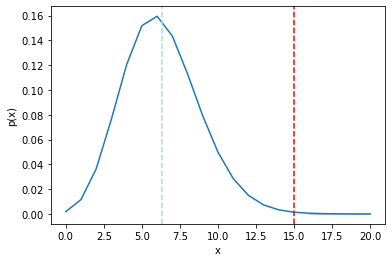

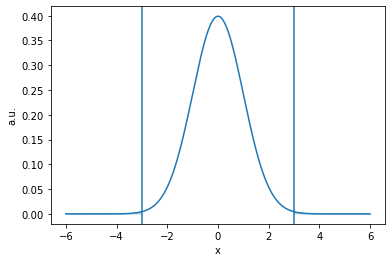

p-value = 0.0026997960632601965
the p-value is < 0.05 so the number is significally different


In [3]:
x0 = 15
mu = 6.3
w = mu - x0

#plotting hurricanes with Poisson distribution.
x = np.linspace(0, 20, 21)
y = stats.poisson.pmf(x,mu)
plt.figure()
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > np.abs(w), color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("p(x)")
plt.xlabel('x')
plt.show()

#plotting with normal distribution and z score of 3 or larger
Z = 3
plt.figure()
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z)
plt.axvline(-Z)
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

#the p-value is 0.002 < alpha = 0.05 so this number is significally different
print('the p-value is < 0.05 so the number is significally different')



2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T value is --> -0.3301229737219645


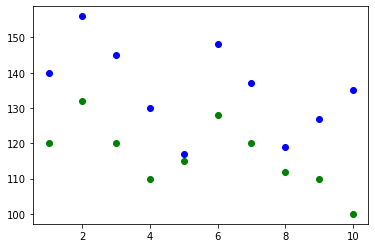

P-value is --> 0.7488615790869966 
since pvalue > 0.05, there is no statistical difference


In [148]:
np.seterr(divide='ignore', invalid='ignore')
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
x1 = np.mean(pre)
x2 = np.mean(post)
n = len(pre)
sigma_pre = np.var(pre, ddof=1)
sigma_post = np.var(post, ddof = 1)
sigma = np.sqrt((sigma_pre**2 + sigma_post**2) / 2)

T = ((x1 - x2) / (sigma * np.sqrt(2 / n)))
print('T value is -->', T)

plt.figure
plt.plot(range(1, 11), pre, 'go')
plt.plot(range(1, 11), post, 'bo')
plt.show()


pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print('P-value is -->', pvalue, '\nsince pvalue > 0.05, there is no statistical difference')


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The period of the population is about 10 years as seen from the plot


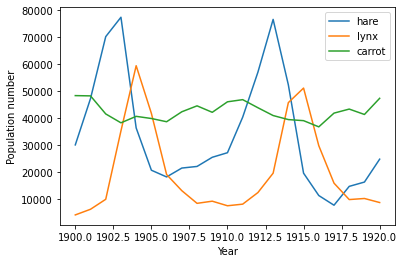

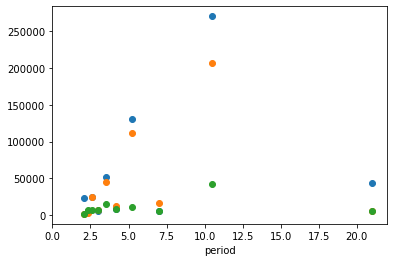

In [150]:
data = np.loadtxt('data/populations.txt')
years = data[:, 0]
population = data[:, 1:]

#plotting the data
plt.figure()
plt.plot(years, population)
plt.xlabel('Year')
plt.ylabel('Population number')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

# plotting periods
ft_population = fftpack.fft(population, axis = 0)
frequency = fftpack.fftfreq(population.shape[0], years[1] - years[0])
period = 1 / frequency

plt.figure()
plt.plot(period, abs(ft_population), 'o')
plt.xlim(0, 22)
plt.xlabel('period')
plt.show
print('The period of the population is about 10 years as seen from the plot')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

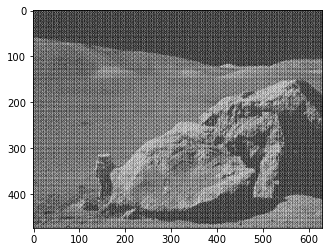

In [27]:
#importing the image
image = plt.imread("moonlanding.png")
plt.imshow(image, plt.cm.gray)

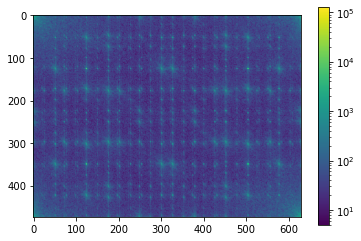

In [123]:
#performing a 2d FFT
image_fft = fftpack.fft2(image)

def spectrum_plot(image_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
plt.figure()
spectrum_plot(image_fft)

Text(0.5, 1.0, 'Resulting Image')

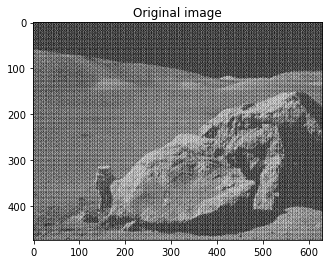

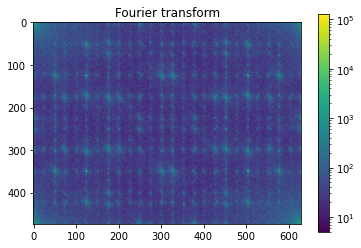

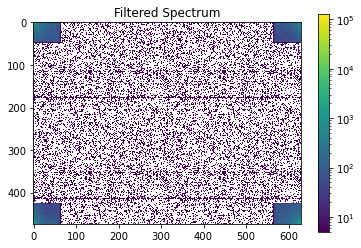

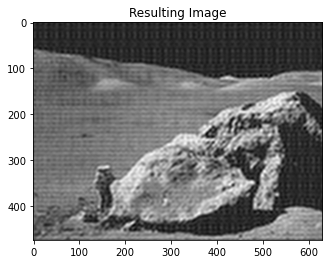

In [168]:
im = plt.imread('moonlanding.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
im_fft = fftpack.fft2(im)

# Show the results
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
# inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal
# and those which contain the periodic noise. 
coeff_fraction = 0.1
image_fft2 = image_fft.copy()
row, column = image_fft2.shape
image_fft2[int(row*coeff_fraction):int(r*(1-coeff_fraction))] = 0
image_fft2[:, int(column*coeff_fraction):int(c*(1-coeff_fraction))] = 0

plt.figure()
spectrum_plot(im_fft2)
plt.title('Filtered Spectrum')

# Reconstruct the denoised image from the filtered spectrum
new_image = fftpack.ifft2(image_fft2).real

plt.figure()
plt.imshow(new_image, plt.cm.gray)
plt.title('Resulting Image')